## Expense tracker analysis
The aim of this notebook is to look at my spending pattern during the time period 2017-2020. I started tracking my expense to better manage my finances. I have tracked almost all my expenses during the period mentioned above using Expense Manager app. I made an entry on this app every time I spend money and also categorized it during the features available in the app. *This is a starting point on my journey in Data Science.*

**Objectives:**
1. Clean the dataset, fill missing entries
2. Plot the Amount spent based on Year/Month
3. Find my top 5 categories of expenditure, all time and year wise
4. Top 3 months with the highest/lowest expense
5. Preferred payment methods
6. Get a better understanding on using python for DS and plotting

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/expense_tracker.csv')
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
print('The datset has {} columns \n{}'.format(len(df.columns), df.columns))

The dataset has 2629 rows and 17 columns
The datset has 17 columns 
Index(['Date', 'Amount', 'Category', 'Subcategory', 'Payment Method',
       'Description', 'Ref/Check No', 'Payee/Payer', 'Status',
       'Receipt Picture', 'Account', 'Tag', 'Tax', 'Quantity', 'Split Total',
       'Row Id', 'Type Id'],
      dtype='object')


In [3]:
df.tail()

,Date,Amount,Category,Subcategory,Payment Method,Description,Ref/Check No,Payee/Payer,Status,Receipt Picture,Account,Tag,Tax,Quantity,Split Total,Row Id,Type Id
2624,12-04-2021,-90.0,Food,Snack,PhonePe,NaN,NaN,Modern Bakery,Uncleared,NaN,Personal Expense,NaN,NaN,1 PCS,NaN,2645,NaN
2625,15-04-2021,-38.0,Food,Super Market,PhonePe,NaN,NaN,Valluvassery,Uncleared,NaN,Personal Expense,NaN,NaN,1 PCS,NaN,2646,NaN
2626,15-04-2021,-111.0,Food,Super Market,PhonePe,NaN,NaN,Valluvassery,Uncleared,NaN,Personal Expense,NaN,NaN,1 PCS,NaN,2647,NaN
2627,21-04-2021,-142.0,Food,Super Market,PhonePe,NaN,NaN,Ibwis Mart,Uncleared,NaN,Personal Expense,NaN,NaN,1 PCS,NaN,2648,NaN
2628,21-04-2021,-110.0,Food,Snack,PhonePe,NaN,NaN,Modern Bakery,Uncleared,NaN,Personal Expense,NaN,NaN,1 PCS,NaN,2649,NaN


## Dataset Structure
The dataset contains transaction information that I recorded in an app from 2017 to 2021. It is also categorized based on its nature. The dataset has a total of 2629 entries (rows) and 17 features (columns). Few features are not recorded because they dont seem to be useful or recording it was cumbersome.
### Column Information
* Date: The date when the expense/income occured.
* Amount: The amount of the transaction. Income is '+' and Expense is '-'.
* Category: The transaction is categorized into 17 categories based on the nature of the transaction.
* Subcategory: The transaction is categorized into 49 subcategories based on the nature of the transaction.
* Payment method: The type of payment used to complete the transaction
* Description: Description of the transaction, if any
* Ref/Check no: Not used
* Status: Cleared/Uncleared, this is for credit card transactions I did not rely on this.
* Receipt Nature: Not Used.
* Account: "Personal Expense" is the type used for all.
* Tag: Tags used (most NaN) -> Vacation, Sports, Masters, Loans
* Tax: Not Used
* Quantity: By default, 1 PCS but Not Used.
* Split Total: Not Used.
* Row Id: This Id is created automatically by the app. But since we already have an Index, I will drop this column.
* Type Id: Not Used.

In [4]:
# Different entries for Tag column
df['Tag'].unique()

array([nan, 'Loans', 'Vacation', 'Sports', 'Masters'], dtype=object)

### Columns to drop
The dataset has 2629 data entries and 17 columns. There are 5 empty and 4 not so useful columns in the dataframe. After removing them, the dataframe has 2629 rows and 8 columns. Amount columns has a prefix of '+' and '-' to indicate income and expense. There are a total of 17 categories and 49 subcategories.

In [5]:
# Find the empty columns in the dataframe and remove them

del_cols = [col for col in df.columns if df[col].isnull().all()] + ['Row Id', 'Status', 'Account', 'Quantity']
print(del_cols)
df.drop(columns=del_cols, axis=1, inplace=True)

['Ref/Check No', 'Receipt Picture', 'Tax', 'Split Total', 'Type Id', 'Row Id', 'Status', 'Account', 'Quantity']


In [6]:
print(df.shape)
df.head()

(2629, 8)


,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag
0,04-01-2017,-120.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN
1,05-01-2017,-40.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN
2,05-01-2017,-150.0,Travel,Taxi,Credit Card,NaN,Cab,NaN
3,05-01-2017,-6000.0,Household,Rent,Credit Card,NaN,Nestaway,NaN
4,05-01-2017,-2041.0,Travel,Bus,Credit Card,NaN,Ksrtc,NaN


In [7]:
# Lets look at the different entries in Categories

cate = df['Category'].unique()
print('There are {} categories and they are: {}'.format(len(cate), str([x for x in cate])))

subcate = df['Subcategory'].unique()
print('\nThere are {} subcategories'.format(len(subcate)))

There are 17 categories and they are: ['Food', 'Travel', 'Household', 'Other', 'Personal', 'Utilities', 'Income', 'Health Care', 'Entertainment', 'Uncategorized', 'Automobile', 'Family', 'Loans', 'Insurance', 'Home Office', 'Vacation', 'Stocks']

There are 49 subcategories


### Uncategorized Entries
There are few categorized as "Uncategorized" in the dataset. I can add few of the category based on the "Payee/Payer" information. Few of the "Payee/Payer" information are categorized, so I will use that same category to fill the uncategorized data.

Looks like there are 8 Payee/Payer which has Category as Uncategorized. Out of this, 3 have multiple entries in the dataset (eg. Uber). The remaining are not categorized.

In [8]:
df[df['Category'] == 'Uncategorized'].head(10)

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag
106,29-03-2017,-53.0,Uncategorized,NaN,Cash,NaN,Bmtc,NaN
438,12-01-2018,-244.0,Uncategorized,NaN,Credit Card,NaN,Freshmenu,NaN
442,13-01-2018,-116.0,Uncategorized,NaN,Credit Card,NaN,Uber,NaN
479,02-02-2018,-194.0,Uncategorized,NaN,Credit Card,NaN,Uber,NaN
547,24-03-2018,-107.0,Uncategorized,NaN,Credit Card,NaN,Uber,NaN
557,29-03-2018,-57.0,Uncategorized,NaN,Credit Card,NaN,Uber,NaN
559,29-03-2018,-100.0,Uncategorized,NaN,Credit Card,NaN,Uber,NaN
560,30-03-2018,-482.0,Uncategorized,NaN,Credit Card,NaN,Uber,NaN
561,30-03-2018,-300.0,Uncategorized,NaN,Credit Card,NaN,Uber,NaN
599,27-04-2018,-515.0,Uncategorized,NaN,Electronic Transfer,NaN,Swiggy,NaN


In [9]:
# Find the unique type of uncategorized "Payee/Payer" information

uncate_entry = list(df[df['Category'] == 'Uncategorized']['Payee/Payer'].unique())
print(uncate_entry)

['Bmtc', 'Freshmenu', 'Uber', 'Swiggy', 'Hatti Kaapi']


In [10]:
# Taking an example of Payee/Payer="Uber", the category=Travel and Subcategory="Taxi". So it seems I had not recorded
# the date correctly for Uber.

r1 = df[(df['Payee/Payer']=="Uber") & (df['Category'] != "Uncategorized")].head(1)
print(r1)

          Date  Amount Category Subcategory       Payment Method Description  \
27  20-01-2017   -50.0   Travel        Taxi  Electronic Transfer         NaN   

   Payee/Payer  Tag  
27        Uber  NaN  


In [11]:
# Function to find the correct Category/Subcategory values for the missing ones (if it exists) and return it to change
# the corresponding value in the dataframe. iloc[0] is used because the value is Series and  I need only the element.

def category(payee):
    r1 = df[(df['Payee/Payer']==payee) & (df['Category'] != 'Uncategorized')].head(1)
    return r1['Category'].iloc[0], r1['Subcategory'].iloc[0] # return only the element
    
for payee in uncate_entry:
    # Try/except is used because some Payee/Payer value are unique and the correct info is not present
    # in the dataframe.
    try:
        df.loc[(df['Payee/Payer']==payee) & (df['Category'] == 'Uncategorized'),['Category','Subcategory']] = category(payee)
    except:
        print("Cannot change for {}".format(payee))
        
    

### Note:
I have given loans to few people during this time period. It was also recorded as an expense in this dataset. I do not want this information to be present in the dataset because this is not a valid expense since I got back most of the loans in the following months. This would also produce wrong results when I look at expense/month. Also, along with income, I had few entries recorded as "repayment of loan" which I will also remove. 
Both these items have Tag=Loans

In [16]:
df[df['Tag']=='Loans'].iloc[:3,]

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag
226,19-07-2017,-20000.0,Loans,NaN,Electronic Transfer,Will repaid next month Aug 20,Anoop R,Loans
399,09-12-2017,-7000.0,Loans,NaN,Electronic Transfer,NaN,Anoop R,Loans
483,05-02-2018,-15000.0,Loans,NaN,Electronic Transfer,NaN,Anoop R,Loans


In [17]:
# Find the index of Tag=Loans and then remove it from the dataset
df.drop(df[df['Tag']=='Loans'].index, inplace=True)

In [18]:
df[df['Category']=='Income'].head()

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag
16,11-01-2017,100.0,Income,Cash back,Electronic Transfer,NaN,Freecharge,NaN
17,11-01-2017,78.0,Income,Cash back,Electronic Transfer,NaN,Freecharge,NaN
30,22-01-2017,75.0,Income,Cash back,Electronic Transfer,NaN,Freecharge,NaN
50,07-02-2017,3100.0,Income,NaN,Electronic Transfer,NaN,Jishnu,NaN
61,14-02-2017,62.0,Income,NaN,Electronic Transfer,NaN,Paytm,NaN


In [19]:
print('Subcategories present in Income are {}'.format(df[df['Category']=='Income']['Subcategory'].unique()) )

Subcategories present in Income are ['Cash back' nan]


In [20]:
# Get a dataframe where Description is available
df2 = df[(df['Category']=='Income') & (df['Description'].notna())]

# Find the index values where Desciption has 'loan' string
index_to_remove = df2[df2['Description'].str.contains('loan')].index
print(index_to_remove)

#df.loc[index_to_remove]
# Remove this index value from the dataset
#df.drop(index_to_remove, inplace=True)


Int64Index([], dtype='int64')


In [21]:
df.head()

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag
0,04-01-2017,-120.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN
1,05-01-2017,-40.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN
2,05-01-2017,-150.0,Travel,Taxi,Credit Card,NaN,Cab,NaN
3,05-01-2017,-6000.0,Household,Rent,Credit Card,NaN,Nestaway,NaN
4,05-01-2017,-2041.0,Travel,Bus,Credit Card,NaN,Ksrtc,NaN


So now the "Loan" type expense/income is removed from the dataset. Remaining is to convert the Dates to Datetime format and add a Month column.

**Update:** I initially converted the date using the command *df['Date'] = pd.to_datetime(df['Date'])* but later realised that the format used for conversion is incorrect. Eg 04-01-2017 (day first) was converted to 01-April-2017. I realised this while plotting graphs for Month vs Expenses. **Include the "format" paramter while converting to datetime!**

In [22]:
# Convert the date to datetime format 
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y")

# For this study, I will be using the data from 2017 to 2020
df = df[df['Date'] <'2021']

# Adding a Month column
df['Month'] = df['Date'].apply(lambda x: x.month_name())
df.head()

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag,Month
0,2017-01-04,-120.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
1,2017-01-05,-40.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
2,2017-01-05,-150.0,Travel,Taxi,Credit Card,NaN,Cab,NaN,January
3,2017-01-05,-6000.0,Household,Rent,Credit Card,NaN,Nestaway,NaN,January
4,2017-01-05,-2041.0,Travel,Bus,Credit Card,NaN,Ksrtc,NaN,January


In [23]:
# Making a Month ordered-categorical type
month_cat = pd.CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Change the Month type to month_cat and sort
df['Month'] = df['Month'].astype(month_cat)

In [24]:
print('The Final dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The Final dataset has 2517 rows and 9 columns


### Exploring through the data
So the final cleaned dataset from 2017-2020 has 2517 rows and 9 columns. Now, I will start going through this find my spending patterns.

In [25]:
# The final datset looks like this
df.head()

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag,Month
0,2017-01-04,-120.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
1,2017-01-05,-40.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
2,2017-01-05,-150.0,Travel,Taxi,Credit Card,NaN,Cab,NaN,January
3,2017-01-05,-6000.0,Household,Rent,Credit Card,NaN,Nestaway,NaN,January
4,2017-01-05,-2041.0,Travel,Bus,Credit Card,NaN,Ksrtc,NaN,January


### Categories and Subcategories
I want to find out how many "Categories" and "Subcategories" are present in the final cleaned data. I also need to check what are the possible combinations of the two and which combination has the highest count.

In [26]:
print('There is a total of {} categories and {} subcategories'.
     format(df['Category'].nunique(), df['Subcategory'].nunique() ))

There is a total of 14 categories and 46 subcategories


In [33]:
# Look at Category->Subcategory data with high no. of transactions
df.groupby(['Category', 'Subcategory']).agg({'Amount':(np.nansum, np.nanmin, np.count_nonzero)})\
.rename(columns={'nansum': 'Total_Sum','count_nonzero':'Count','nanmin':'Max_Spend'})\
.sort_values(('Amount','Count'), ascending=False).iloc[:5]

Amount                 
                     Total_Sum Max_Spend  Count
Category Subcategory                           
Food     Restaurant  -120749.4   -1949.0  851.0
         Snack        -51985.5    -950.0  281.0
Travel   Bus          -30338.5   -3000.0  157.0
         Taxi         -19964.0    -970.0  144.0
Food     Groceries    -48957.8   -2788.0  141.0

In [34]:
# Look at Category->Subcategory data with high Amounts
df.groupby(['Category', 'Subcategory']).agg({'Amount':(np.nansum, np.nanmin, np.count_nonzero)})\
.rename(columns={'nansum': 'Total_Sum','count_nonzero':'Count','nanmin':'Max_Spend'})\
.sort_values(('Amount','Total_Sum'), ascending=True).head()

Amount                 
                          Total_Sum Max_Spend  Count
Category    Subcategory                             
Household   Rent         -308816.51 -20682.00   43.0
Food        Restaurant   -120749.40  -1949.00  851.0
Insurance   Life         -104274.74 -26129.52    4.0
Other       Online Store  -78680.00 -14300.00   33.0
Health Care Dental        -72620.00 -22000.00   29.0

From the above data, we can see that I spent the most on 'Household->Rent' followed by 'Food' and 'Insurance'. Also, based on count, I used to transact often on 'Food', 'Entertainment' and 'Travel'.

## Spending based on Month
Here I will calculate my expenses based on Month and Year. 
1. I need to separate the dataframe based on year.
2. Then for each year, find the total expenditure for the month and its count
3. Plot the result 


In [35]:
df.head()

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag,Month
0,2017-01-04,-120.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
1,2017-01-05,-40.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
2,2017-01-05,-150.0,Travel,Taxi,Credit Card,NaN,Cab,NaN,January
3,2017-01-05,-6000.0,Household,Rent,Credit Card,NaN,Nestaway,NaN,January
4,2017-01-05,-2041.0,Travel,Bus,Credit Card,NaN,Ksrtc,NaN,January


**Note:** I plan to write a function to get the Month vs Expense data for each year. Below I am trying the figure how to write the function by splitting the code. Finally I use this separated code into a single function that will separate the dataframe based on year and plot the Month vs Expense data.

In [36]:
# Split the dataframe based on Year
df_2017 = df[(df['Date']>='2017') & (df['Date']<'2018')]
df_2018 = df[(df['Date']>='2018') & (df['Date']<'2019')]
df_2019 = df[(df['Date']>='2019') & (df['Date']<'2020')]
df_2020 = df[(df['Date']>='2020') & (df['Date']<'2021')]

df_2017.head()

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag,Month
0,2017-01-04,-120.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
1,2017-01-05,-40.0,Food,Restaurant,Cash,NaN,Cafeteria,NaN,January
2,2017-01-05,-150.0,Travel,Taxi,Credit Card,NaN,Cab,NaN,January
3,2017-01-05,-6000.0,Household,Rent,Credit Card,NaN,Nestaway,NaN,January
4,2017-01-05,-2041.0,Travel,Bus,Credit Card,NaN,Ksrtc,NaN,January


In [38]:
# Groupby Mount
df_m = df_2017.groupby('Month').agg({'Amount':(np.count_nonzero, np.nansum)})\
.rename(columns={'nansum': 'Total_spend', 'count_nonzero':'Frequency'})

df_m.head()

Amount            
         Frequency Total_spend
Month                         
January       43.0    -25647.0
February      36.0    -10417.0
March         29.0    -29353.0
April         26.0    -26649.0
May           33.0    -10040.0

In [39]:
# Convert column to single-index
df_m.columns = df_m.columns.map('_'.join)
df_m.reset_index(inplace=True)
df_m.head()

,Month,Amount_Frequency,Amount_Total_spend
0,January,43.0,-25647.0
1,February,36.0,-10417.0
2,March,29.0,-29353.0
3,April,26.0,-26649.0
4,May,33.0,-10040.0


In [40]:
# Change the Total spend to positive for plotting. (Here '-' represented Expense)
df_m['Amount_Total_spend'] = np.abs(df_m['Amount_Total_spend']) 

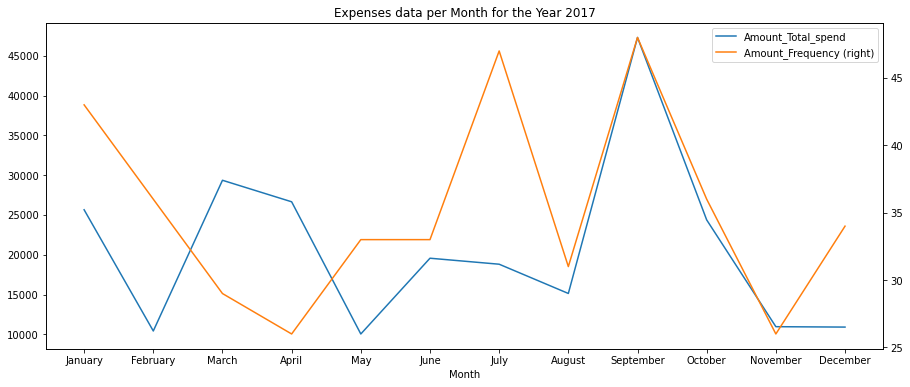

In [43]:
ax1 = df_m.plot(x='Month', y='Amount_Total_spend')
df_m.plot('Month', 'Amount_Frequency', secondary_y=True, ax=ax1, figsize=(15,6))
plt.xticks(np.arange(12), df_m['Month'].values)
plt.title("Expenses data per Month for the Year {}".format(2017))
plt.show()

In [44]:
# Writing the above lines of code as function. This function accepts the dataframe and year and then plots
# a line graph between Expense per month for that particular year

def spend_vs_month(df_, year_value=2017):
    # Split the dataframe based on year
    df_ = df_[(df_['Date']>=str(year_value)) & (df_['Date']<str(year_value+1))]
    
    # Use groupby to get Total Amount and Frequency of Spend data based on Month
    df_m = df_.groupby('Month').agg({'Amount':(np.count_nonzero, np.nansum)})\
    .rename(columns={'nansum': 'Total_spend', 'count_nonzero':'Transactions'})
    
    # Change the multi-index columns to single index
    df_m.columns = df_m.columns.map('_'.join)
    df_m.reset_index(inplace=True)
    
    # Change the Total spend to positive for plotting. (Here '-' represented Expense)
    df_m['Amount_Total_spend'] = np.abs(df_m['Amount_Total_spend']) 
    
    # Plot the graph
    ax = df_m.plot(x='Month', y='Amount_Total_spend', color='red')
    df_m.plot('Month', 'Amount_Transactions', color ='orange', secondary_y=True, ax=ax, figsize=(15,6))
    plt.xticks(np.arange(len(df_m['Month'])), df_m['Month'].values)
    plt.title("Expenses per Month for the Year {}".format(year_value))
    plt.show()
    
    # Compute the Total_amount, Total_transactions and Average Amount per transcation
    t_amt = np.sum(df_m['Amount_Total_spend'])
    t_trans = np.sum(df_m['Amount_Transactions'])
    print("Total Amount Spent: Rs {:.2f}\nTotal no of transactions: {:.0f}\nAverage amount per trasaction: Rs {:.2f}/transaction"
          .format(t_amt, t_trans, t_amt/t_trans))
    

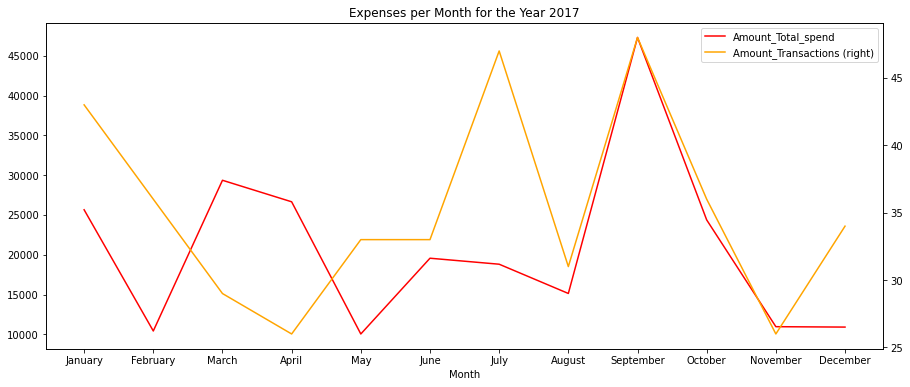

Total Amount Spent: Rs 249134.80
Total no of transactions: 422
Average amount per trasaction: Rs 590.37/transaction


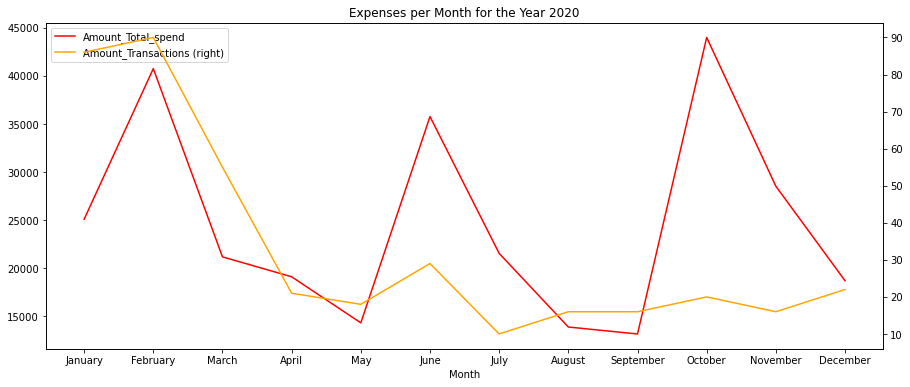

Total Amount Spent: Rs 295995.72
Total no of transactions: 399
Average amount per trasaction: Rs 741.84/transaction


In [48]:
# Plot for the year 2017 and 2020
spend_vs_month(df,2017)
spend_vs_month(df,2020)

In [47]:
u, v = (np.sum(df['Amount'])*-1, np.count_nonzero(df['Amount']))
        
print("Total Expense from 2017-2020: Rs {:.2f}\nTotal no of Transactions: {}\n\
Average amount per transaction: Rs {:.2f}".format(u,v,u/v ))

Total Expense from 2017-2020: Rs 1184589.89
Total no of Transactions: 2517
Average amount per transaction: Rs 470.64


In [50]:
# Looking at the top 5 transactions for February 2020 (spike in Amount spent)
# There was an Household settlement amount of Rs 20k which resulted in the spike in February

df_2020[df_2020['Month']=="February"].sort_values('Amount').head(3)

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag,Month
2221,2020-02-02,-20682.0,Household,Rent,Google Pay,Rent + splitwise + Vimal settlement,Vibin,NaN,February
2216,2020-02-01,-2070.0,Travel,Airplane,Credit Card,BLR to COK,Smart Buy,NaN,February
2220,2020-02-01,-2000.0,Health Care,Dental,Cash,NaN,Orthodontix and More,NaN,February


In [53]:
# Had to buy extra items for WFH
df_2020[df_2020['Month']=="June"].sort_values('Amount').head(3)

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag,Month
2424,2020-06-18,-8811.0,Home Office,Stationery,Amazon Pay,WFH at Kochi payed by Deepak,Amazon,NaN,June
2403,2020-06-01,-7183.0,Household,Rent,Google Pay,NaN,Vibin,NaN,June
2402,2020-06-01,-4961.0,Household,Household Tools,Credit Card,NaN,Amazon,NaN,June


In [54]:
df_2020[df_2020['Month']=="November"].sort_values('Amount').head(3)

,Date,Amount,Category,Subcategory,Payment Method,Description,Payee/Payer,Tag,Month
2509,2020-11-30,-13712.0,Personal,Education,Debit,Masters,ETS,Masters,November
2500,2020-11-08,-7345.0,Household,Rent,Google Pay,NaN,Vibin,NaN,November
2494,2020-11-02,-2000.0,Household,Rent,Google Pay,Maintenance,Sachin Kumar,NaN,November


Based on the above graphs:
* Total Amount spent and no of transactions increased over the years except in 2020. As they say, "*when you earn more, you spend more*"
* But the Average amount per transaction decreased over the years except in 2020. 
* Year 2020: Increased spending in Household category had resulted in the increase in avg amount per transaction. Covid-19 pandemic also resulted in travelling back home and buying essential items for WFH

### Next lets take a look at the Expense vs Month for all-time

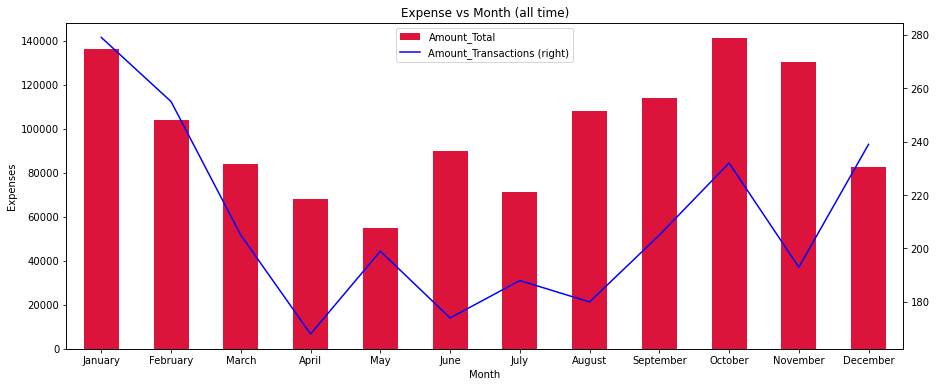

Top 5 expensive months are: 
October (Rs 141130.24)
January (Rs 136164.00)
November (Rs 130515.80)
September (Rs 114145.00)
August (Rs 108202.49)

Least 5 expensive months are: 
May (Rs 54899.99)
April (Rs 68000.50)
July (Rs 71106.90)
December (Rs 82453.30)
March (Rs 84125.50)


In [66]:
# Make a df based on Months
df_m = df.groupby('Month').agg({'Amount':(np.sum, np.count_nonzero)})\
.rename(columns={'sum': 'Total', 'count_nonzero': 'Transactions'})
df_m.columns = df_m.columns.map('_'.join)
df_m.reset_index(inplace=True)

# Convert the Amount to absolute values
df_m['Amount_Total'] = df_m['Amount_Total'].apply(np.abs)

# Plot Month vs Expenses
ax = df_m.plot(x='Month', y='Amount_Total', kind='bar', figsize=(15,6), rot=0, color='#DC143C', ylabel='Expenses')
df_m.plot(y='Amount_Transactions', kind='line', color='b', legend=True, secondary_y=True, ax=ax)
plt.title("Expense vs Month (all time)")
plt.show()

# Extract the bottom and top 5 expensive months
bot_5 = df_m.sort_values('Amount_Total').set_index('Month')['Amount_Total'].head(5)
top_5 = df_m.sort_values('Amount_Total').set_index('Month')['Amount_Total'].tail(5)[::-1]

# Print the information
print("Top 5 expensive months are: ")
for idx, item in top_5.items():
    print("{} (Rs {:.2f})".format(idx, item))

print("\nLeast 5 expensive months are: ")
for idx, item in bot_5.items():
    print("{} (Rs {:.2f})".format(idx, item))

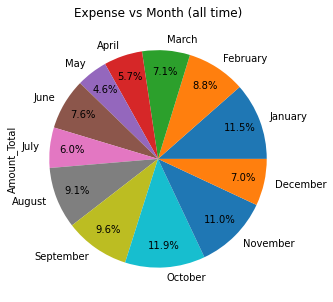

In [67]:
# Just wanted to check how a Pie Chart would look instead of bar plot
df_m.set_index('Month', inplace=True)
df_m.plot(y='Amount_Total', kind='pie', figsize=(5,5), legend=False, autopct='%.1f%%', pctdistance=0.8, labeldistance=1.1)
plt.title("Expense vs Month (all time)")
plt.show()

From the pie chart, it looks like my expenses increases in the back-end of the year. 
October, November and January are my most expensive month. After looking the top 5 expenses in these months, I found out why.
* October - I usually pay my Insurance premium in October and looks like I had bought few expensive items on this month like a phone and a monitor. 
* November - I went on vacation during this month in 2018 and 2019. Usually during this timeframe, workload decreases and hence the vacation plans.


## Preferred Payment Method
I want to find out which payment method I use the most. The most common types of payment methods are Case, Credit/Debit card, Internet Banking, Digital wallets and UPI (unified payments interface). I think I use UPI method the most because it takes the least time to complete the payment.

In [69]:
# Let's check the available payment methods
df['Payment Method'].unique()

array(['Cash', 'Credit Card', 'Electronic Transfer', 'Debit', 'Paytm',
       'Amazon Pay', 'PhonePe', 'Google Pay', 'Payzapp', 'Debit Card'],
      dtype=object)

In [71]:
# Of the available 10 payment methods, lets check the counts
df.groupby('Payment Method').agg({'Payment Method':np.count_nonzero})\
.rename(columns=({'Payment Method':'Count'})).sort_values('Count', ascending=False).head(5)

,Count
Payment Method,
Credit Card,745
Electronic Transfer,505
Paytm,447
Cash,319
Google Pay,261


Here Debit and Debit Card are the same (error in recording). Need to rectify this in the dataset.

Types of Payment Method
* UPI - Google Pay and PhonePe
* Wallet - Amazon Pay, Payzapp, Paytm

In [74]:
# Change the Debit to "Debit Card"
df.loc[df['Payment Method']=='Debit', 'Payment Method'] = "Debit Card"

df_pay = df.groupby('Payment Method').agg({'Payment Method':np.count_nonzero})\
.rename(columns=({'Payment Method':'Count'})).sort_values('Count', ascending=False)

df_pay.head()

,Count
Payment Method,
Credit Card,745
Electronic Transfer,505
Paytm,447
Cash,319
Google Pay,261


In [75]:
# Add a new entry called UPI and Digital Wallets
df_pay.loc['UPI'] = df_pay.loc['Google Pay'] + df_pay.loc['PhonePe'] 
# Drop the Google Pay and PhonPe rows
df_pay.drop(['Google Pay', 'PhonePe'], axis='rows', inplace=True)

df_pay.loc['Digital Wallets'] = df_pay.loc['Paytm'] + df_pay.loc['Amazon Pay'] + df_pay.loc['Payzapp']
df_pay.drop(['Paytm', 'Amazon Pay', 'Payzapp'], axis='rows', inplace=True)

df_pay.head()

,Count
Payment Method,
Credit Card,745
Electronic Transfer,505
Cash,319
Debit Card,22
UPI,322


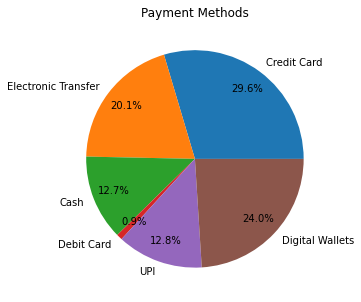

In [76]:
# Make a Pie chart to show this information
df_pay.plot(x='Payment Method', y='Count', kind='pie', legend=False, autopct='%.1f%%', 
            pctdistance=0.8, labeldistance=1.1, ylabel='', title='Payment Methods', figsize=(5,5))
plt.show()

It is clear from the above chart that I used **Credit Card** for most of my transactions (~30%), followed by Digital Wallets and Electronic Transfer method. 

I thought UPI would have a major share since it is my preferred payments now.


### Monthly Payment Pattern
Here I will plot a line graph between Month and Count of payment method.

**TODO**
1. Make a column for Month-Year information
2. Group by Month-Year and find the count for each payment method
3. Restructure the dataframe using unstack() for ease in plotting
4. Plot the Count information for the period 2017-2020. Use few columns so the graph does not get messy

### Starting with All-time Payment method count

In [80]:
df2 = df[['Date', 'Month', 'Payment Method']].copy()

#df2['Mon_Yr'] = df2['Date'].apply(lambda x: "{}-{}".format(x.month_name(), x.year))
df2['Mon_Yr'] = pd.to_datetime(df2['Date'], format="%Y-%m-%d").dt.to_period('M')
print(df2.head())

print(df2['Mon_Yr'].dtype)

        Date    Month Payment Method   Mon_Yr
0 2017-01-04  January           Cash  2017-01
1 2017-01-05  January           Cash  2017-01
2 2017-01-05  January    Credit Card  2017-01
3 2017-01-05  January    Credit Card  2017-01
4 2017-01-05  January    Credit Card  2017-01
period[M]


In [89]:
def paym_year_trend(df_, cols_to_show=['Credit Card', 'Paytm']):
    # Extract only the Date and Payment Method columns
    df_ = df_[['Date', 'Payment Method']].copy()
    # Make a column for Year-Month 
    df_['Mon_Yr'] = pd.to_datetime(df_['Date'], format="%Y-%m-%d").dt.to_period('M')
    
    # Group by, unstack, replace NaN, rename columns
    df_pay=df_.groupby(['Mon_Yr', 'Payment Method']).agg({'Payment Method':np.count_nonzero})
    df_pay = df_pay.unstack()
    df_pay = df_pay.replace(np.nan,0)
    df_pay.columns = df_pay.columns.map('_'.join).str.replace('Payment Method_','')
    df_pay.reset_index(inplace=True)
    
    # Plot the graph
    try:
        df_pay.plot(y=cols_to_show, kind='line', figsize=(25,10))
        plt.xticks(np.arange(len(df_pay['Mon_Yr'])), df_pay['Mon_Yr'], rotation=60)
        plt.xlabel('Month - Year')
        plt.ylabel('Count')
        plt.title('Payment Methods Trend')
        plt.show()
    except KeyError:
        print("Please modify the Payment Method list. Available Payment methods in {} are:".format(year_value))
        print(cols_to_show)

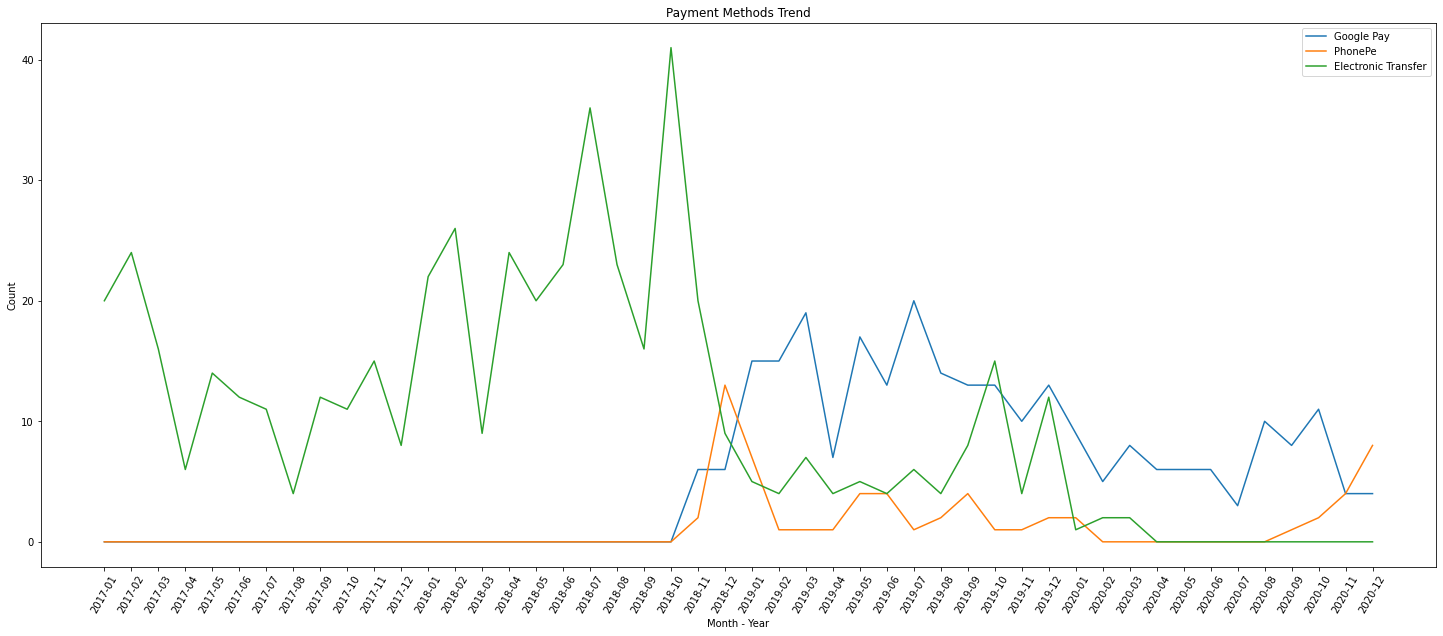

In [90]:
paym_year_trend(df,['Google Pay', 'PhonePe','Electronic Transfer'])

['Cash' 'Credit Card' 'Electronic Transfer' 'Debit Card' 'Digital Wallet'
 'UPI']


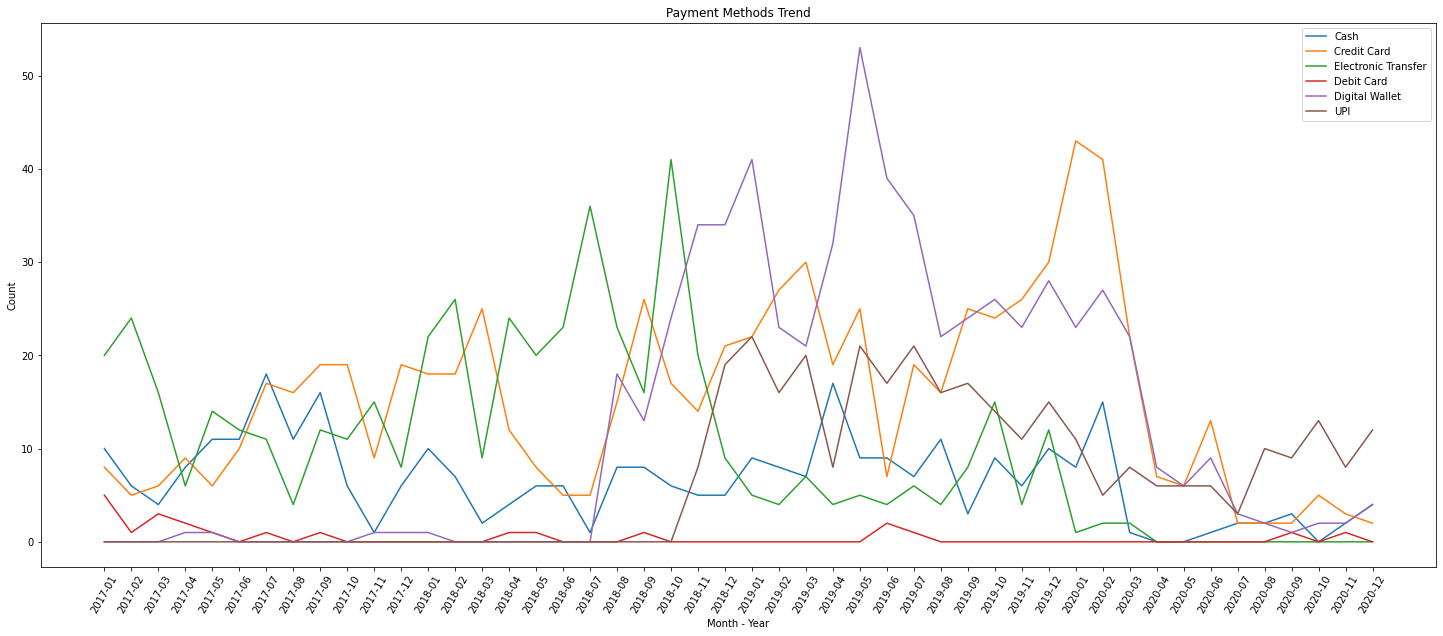

In [91]:
df2 = df[['Date', 'Payment Method']].copy()
df2['Payment Method'] = df2['Payment Method']\
.replace(to_replace=['Google Pay', 'PhonePe', 'Paytm', 'Amazon Pay', 'Payzapp'],
        value=['UPI', 'UPI', 'Digital Wallet', 'Digital Wallet', 'Digital Wallet'])

print(df2['Payment Method'].unique())

paym_year_trend(df2,df2['Payment Method'].unique())

From the above graphs, it is very clear that the number of transactions for all payments started going downhill at the start of 2020. This is due to Covid-19 pandemic. Restrictions were introduced around March and work from home (WFH) was also started around this time. Also, it is important to note that I started using more of UPI payments in 2020. This paymemt was preferred since it is easy to use and most people adopted this method after it was introduced.

I will also plot the All-time expense data since that will have some more information

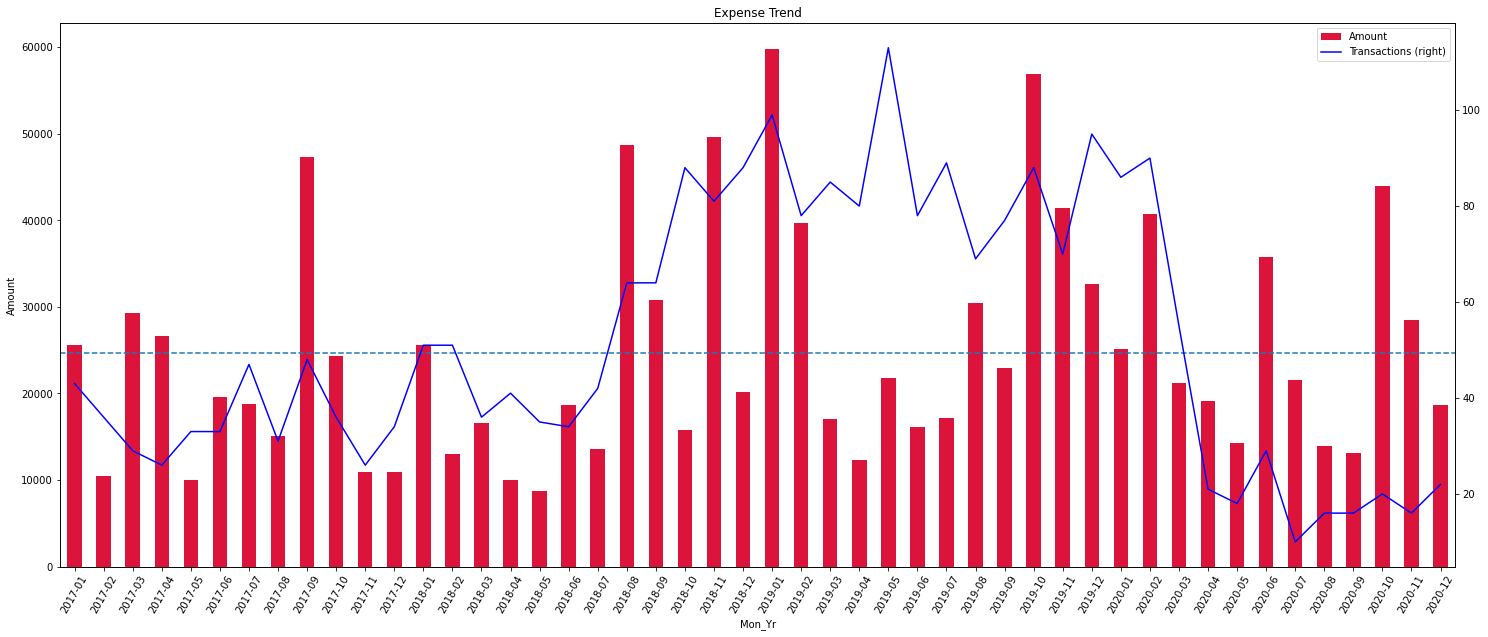

Average expense amount per month is Rs 24678.96


In [92]:
def expense_trend(df_):
    # Extract only the Date and Payment Method columns
    df_ = df_[['Date', 'Amount']].copy()
    # Make a column for Year-Month 
    df_['Mon_Yr'] = pd.to_datetime(df_['Date'], format="%Y-%m-%d").dt.to_period('M')
     

    # Group by, rename columns
    df_pay = df_.groupby('Mon_Yr').agg({'Amount':(np.nansum, np.count_nonzero)})
    df_pay.columns = df_pay.columns.map('_'.join)
    df_pay = df_pay.rename(columns={'Amount_nansum':'Amount',
                                   'Amount_count_nonzero':'Transactions'})
    df_pay.reset_index(inplace=True)
    
    # Change the expense amount to positive
    df_pay['Amount'] = df_pay['Amount'].apply(np.abs)
    # Get the mean Amount per month (Total/48)
    mean_1 = np.mean(df_pay['Amount'])
    
    # Plot the graph
    try:
        # First bar plot for Amount per Month
        ax1 = df_pay.plot(x='Mon_Yr', y='Amount', ylabel='Amount',kind='bar', figsize=(25,10),color='#DC143C')
        # A horizontal line to show the mean Amount per Month
        plt.axhline(y=mean_1,linestyle='--')
        # Plot the secondary line plot for no. of Transactions
        df_pay.plot(y='Transactions', kind='line', color='b', legend=True, ax=ax1, secondary_y=True,rot=60)
        plt.xticks(np.arange(len(df_pay['Mon_Yr'])), df_pay['Mon_Yr'] )
        plt.xlabel('Month - Year')
        plt.title('Expense Trend')
        plt.show()
        print("Average expense amount per month is Rs {:.2f}".format(mean_1))
    except KeyError:
        print("Please modify the Payment Method list. Available Payment methods in {} are:".format(year_value))
        print(cols_to_show)
        
expense_trend(df)

### Top 5 Catgegories of Expenses
Here I find my top 5 expense category based on amount and no of transactions

In [94]:
# Groupby based on Category. Take sum and count of 'Amount'
df2 = df.groupby('Category').agg({'Amount':(np.sum,np.count_nonzero)})

# Rename the columns to 'Amount' and 'Transactions'. Also format both columns
df2.columns = df2.columns.map('_'.join).str.replace('Amount_','')
df2 = df2.rename(columns={'sum':'Amount','count_nonzero':'Transactions'})
#df2['Amount'] = df2['Amount'].apply(np.abs)
df2['Transactions'] = df2['Transactions'].apply(int)

df2.head()

,Amount,Transactions
Category,,
Automobile,-1550.0,3
Entertainment,-70013.5,144
Family,-25328.0,6
Food,-226906.7,1287
Health Care,-76291.0,34


In [95]:
# Top categories based on Amount
df2.sort_values('Amount').head()

,Amount,Transactions
Category,,
Household,-322984.51,51
Food,-226906.70,1287
Travel,-183983.14,439
Personal,-119702.00,53
Insurance,-104274.74,4


In [96]:
# Top categories based on Transactions
df2.sort_values('Transactions', ascending=False).head()

,Amount,Transactions
Category,,
Food,-226906.70,1287
Travel,-183983.14,439
Income,226980.70,284
Utilities,-75948.00,152
Entertainment,-70013.50,144


**Note:** Here, the Income category refers to all the refunds and settlement amounts I received from friends. There was no provision to mark the subcategory of income like food, entertainment, etc. So, for listing out my top expenses based on category, I am not using this 'Income' category

In [98]:
# Drop the Income category
df2.drop('Income', inplace=True)
df2['Amount'] = df2['Amount'].apply(np.abs)
df2.sort_values('Amount').head()

,Amount,Transactions
Category,,
Automobile,1550.0,3
Family,25328.0,6
Home Office,34979.0,8
Entertainment,70013.5,144
Utilities,75948.0,152


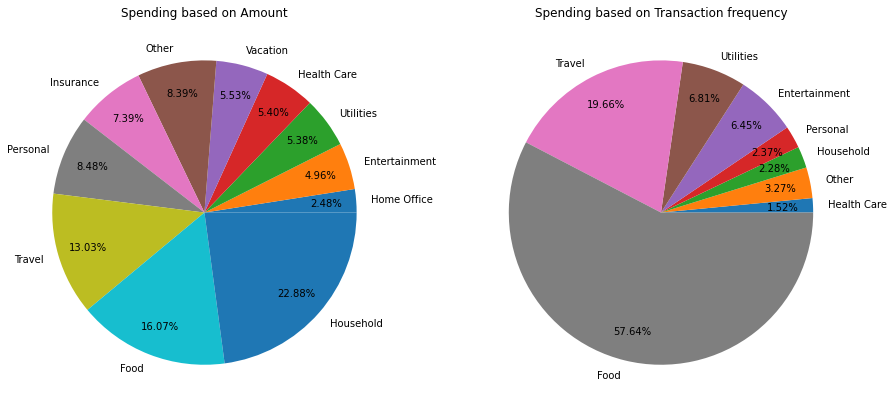

In [99]:
# Separating Transaction and Amount
df2_trans = df2.sort_values('Transactions')['Transactions']
df2_amt = df2.sort_values('Amount')['Amount']

# Calculate 1% threshold for transactions and 2% for amount
# We will group all below 1% to Others category
thres_1 = np.sum(df2_trans)*.01
thres_2 = np.sum(df2_amt)*.02

# Add the sum to Other and then remove them from the series
df2_trans['Other'] +=  np.sum(df2_trans[df2_trans<thres_1])
df2_trans.drop(df2_trans[df2_trans<thres_1].index, inplace=True)

df2_amt['Other'] += np.sum(df2_amt[df2_amt<thres_2])
df2_amt.drop(df2_amt[df2_amt<thres_2].index, inplace=True)

# Plot the pie charts
fig, axes = plt.subplots(nrows=1, ncols=2)

df2_amt.plot(kind='pie',autopct='%.2f%%' , pctdistance=0.8, labeldistance=1.1, 
             legend=False, figsize=(15,15), ax=axes[0], ylabel='', title='Spending based on Amount')

df2_trans.plot(kind='pie',autopct='%.2f%%' , pctdistance=0.8, labeldistance=1.1, 
               legend=False, figsize=(15,15), ax=axes[1], ylabel='', title='Spending based on Transaction frequency')
plt.show()

From the pie charts, we can see that I spent the most on Household, Food and Travel - more than half of my total expenses.

Also, I did the most no of transactions in Food(57%) category, followed by Travel. Household did not feature here since Rent is the main subcategory here and it is a high value transaction and only paid once a month.

## Conclusion
I did this analysis so that I get farmiliar to the tools used in Data Science and to answer few questions that I had about my spending.

**My top 5 categories of expenditure**

Household, Food, Travel, Personal and Insurance were my top 5 expenses based on the amount spent

**My top 5 months with the highest/lowest expenses**

Highest expensive months: October, January, November, September and August - Account for 53% of my total expenses. This shows that I usually spent the most during the end of the year.
Least expensive months: May, April, July, December and March - Account for 30% of my total expenses.

**My preferred payment methods**

My preferred payment methods are Credit card, Digital wallets and Electronic Transfer. They account for nearly 74% of my payments. I used Cash only for 13% of the time. This shows that most people now accept a digital form of payment instead of cash payments. The country is surely transforming to a digital economy.